# 1. Import

the following import statement gives you access to the following subpackages and modules:  
- features
    - feature 
- indices  
    - kbdi
    - ffdi
- utilities  
    - input_output
    - conversion
    - plotter

In [1]:
import sys, os
sys.path.append(os.path.abspath('../'))

In [2]:
import datetime

from kbdiffdi import *

ModuleNotFoundError: No module named 'kbdiffdi'

# 2. read input data and create the data structures

In this example, we assume the input data is in the form of a csv. In order for DROMOT to properly calculate the Keetch-Byram Drought Index (KBDI) and McArthur's Forest Fire Danger Index (FFDI), the input data must follow some conventions. For csvs, the data must be formatted as follows:  

|KNYSNA station | date | precipitation (mm) | temperature (C) | relative humidity (%) | wind speed (m/s)|  
|:-------------:|:----:|:------------------:|:---------------:|:---------------------:|:---------------:|  
||19970101|0|20.7|69|3.5|  
||19970102|0|20.4|60|1.3|  
||19970103|0.2|21|68|4|  
|| ... | ... | ... | ... | ... |  
|| ... | ... | ... | ... | ... |  
|| ... | ... | ... | ... | ... |  
||20171231|1.3|24.2|70|1.2|  
  
  
Date should be in the form yyyymmdd, preciptation data must be in millimeters, temperature in celsius, relative humidity in percent, and wind speed in meters per second.  

In [7]:
filename = "../kbdiffdi/data/Knysna.csv"
rain, temp, relhum, wind = input_output.load_csv(filename)

print("precipitation:")
print(rain)
print()
print("temperature:")
print(temp)

precipitation:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)

temperature:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


# 3. Instantiate a KBDI object, fit it to the data, and plot the output

kdbi:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


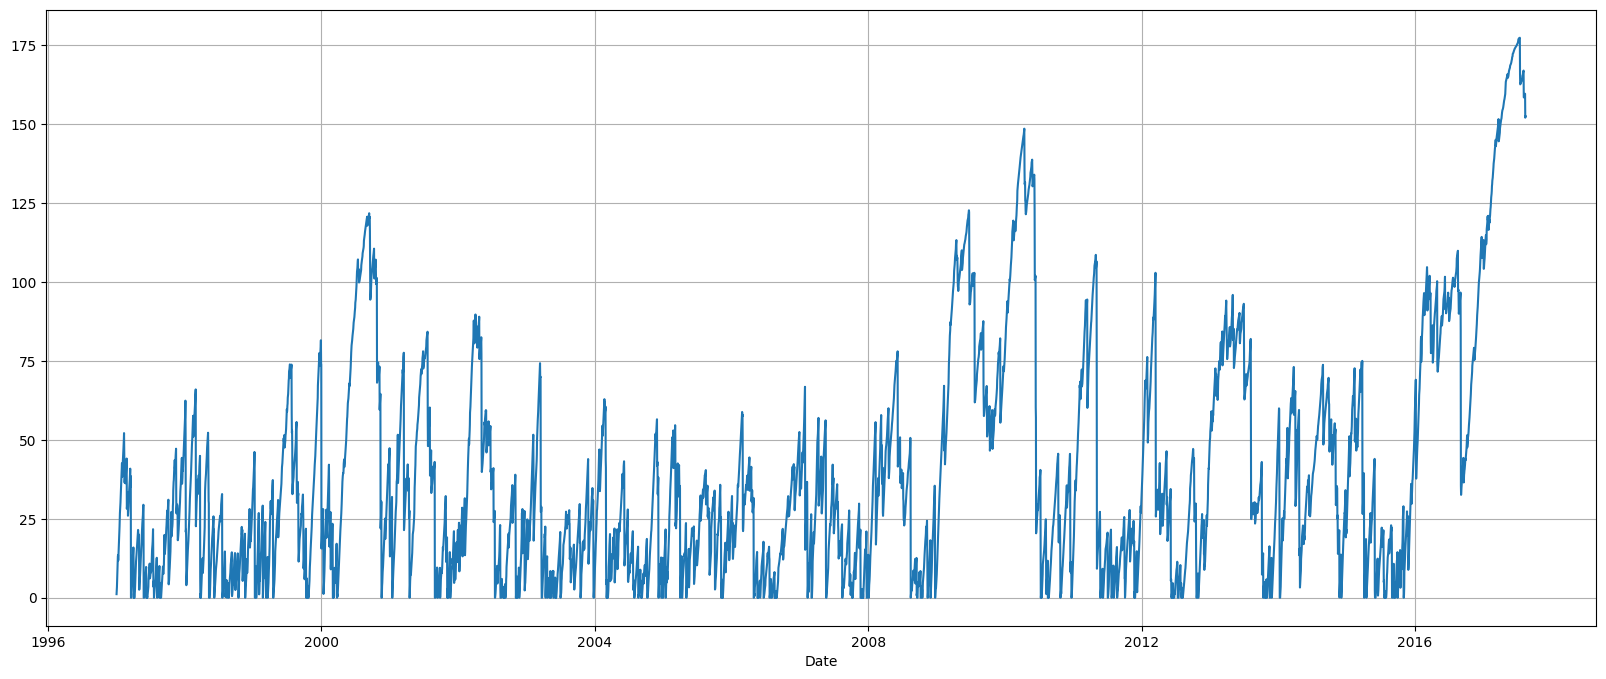

In [8]:
kbdi = indices.KBDI()
out = kbdi.fit(temp, rain)
print("kdbi:")
print(out)
plotter.timeseries(out)

# 4. Instantiate an FFDI object and fit it to the data

In [9]:
ffdi = indices.FFDI()
out_ffdi, out_df = ffdi.fit(out, rain, temp, wind, relhum)

# 5. Print output FFDI and DF objects and plot the output data

ffdi:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


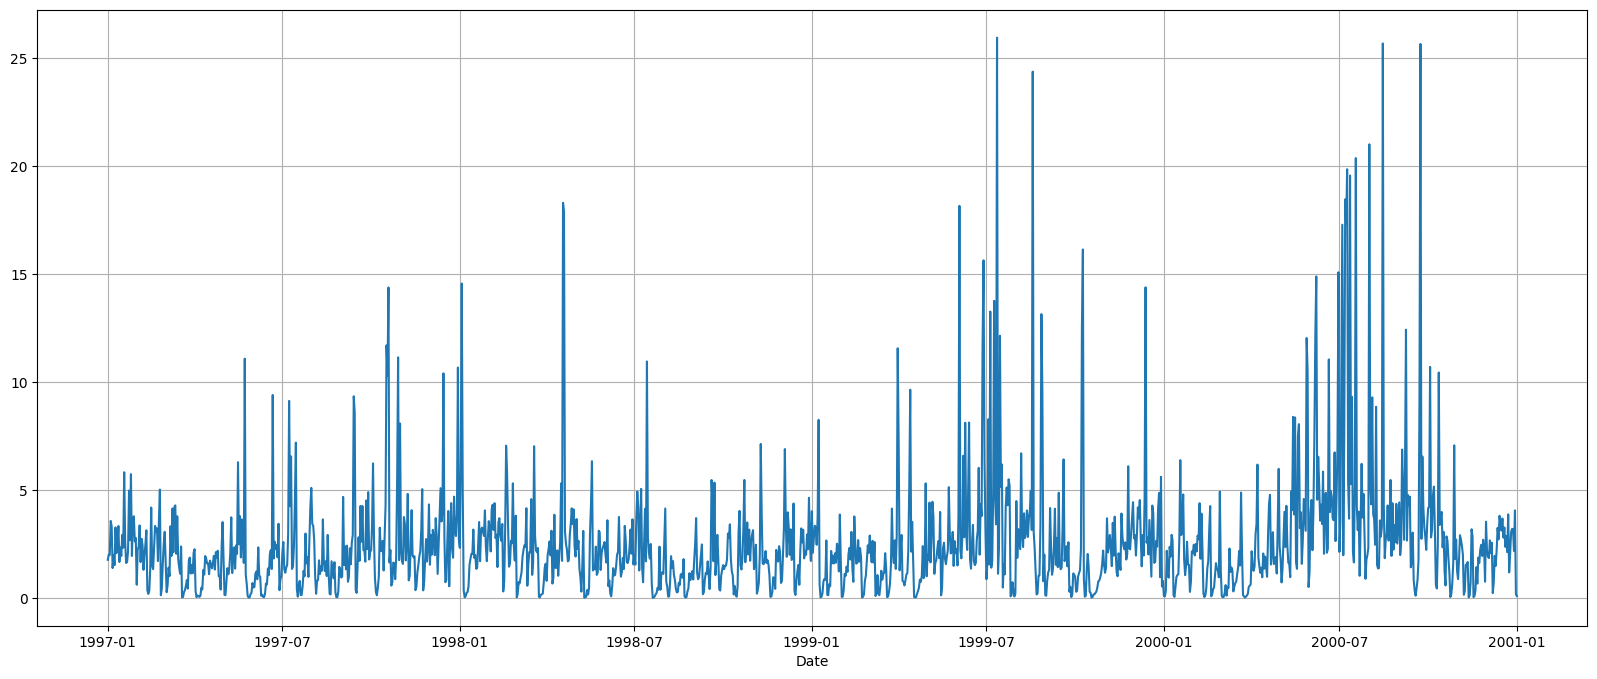


df:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(1997, 1, 1, 0, 0)], [0, 0, datetime.datetime(2017, 8, 14, 0, 0)]] shape: (7531, 1, 1, 1)


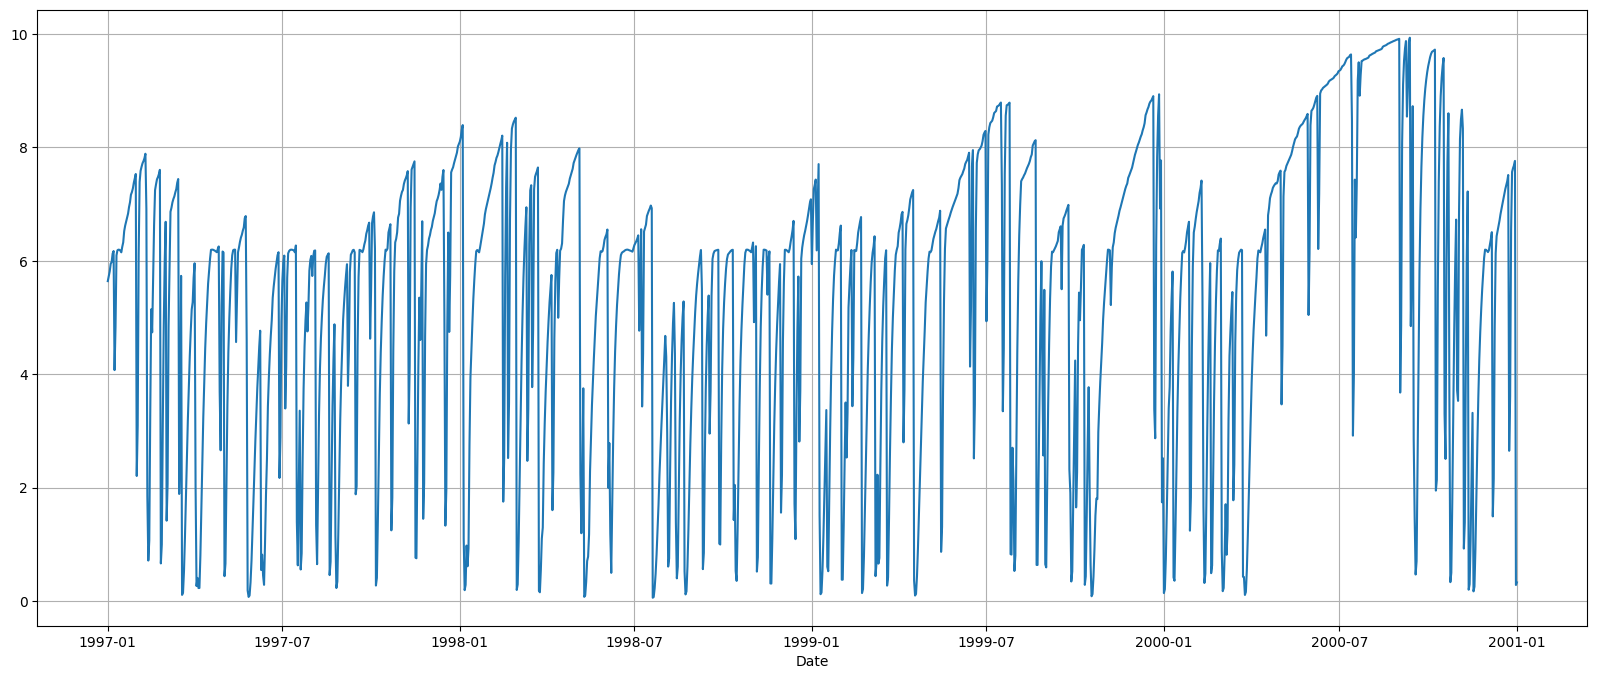

In [10]:
print("ffdi:")
print(out_ffdi)
plotter.timeseries(out_ffdi,None,datetime.datetime(2001,1,1))
print()
print("df:")
print(out_df)
plotter.timeseries(out_df,None,datetime.datetime(2001,1,1))

In [11]:
out_ffdi.data[out_ffdi.datelist.index(datetime.datetime(2000,1,1)):out_ffdi.datelist.index(datetime.datetime(2001,1,1))+1].flatten()

array([7.74210737e-02, 6.95597326e-02, 3.04143964e-01, 2.17829794e+00,
       1.13942234e+00, 9.37373744e-01, 2.36351857e+00, 1.90827749e+00,
       2.91571209e+00, 2.64824638e+00, 1.17686025e-01, 4.42712788e-02,
       4.83910216e-01, 9.63806367e-01, 1.05519067e+00, 1.09514482e+00,
       2.70144074e+00, 6.37551791e+00, 2.90930597e+00, 3.18467636e+00,
       4.78802260e+00, 1.78309829e+00, 1.05048896e+00, 1.49351310e+00,
       2.59353912e+00, 1.54381330e+00, 1.52460293e+00, 2.74187784e-01,
       7.36030872e-01, 2.15150221e+00, 2.07514663e+00, 2.45792251e+00,
       1.96401963e+00, 2.49114288e+00, 2.14581796e+00, 2.87976841e+00,
       2.70941859e+00, 4.38051997e+00, 1.80920638e+00, 3.89991674e+00,
       2.22155519e+00, 1.97515360e-01, 3.80391333e-02, 1.08080904e-01,
       4.70745959e-01, 1.36369727e+00, 1.70071602e+00, 3.14003108e+00,
       4.24962229e+00, 6.94871299e-02, 1.44201557e-01, 4.02988087e-01,
       4.72346131e-01, 1.01334511e+00, 1.60407330e+00, 1.31265456e+00,
      